In [1]:
#%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import csv
#import os
#import sys

#import re
import glob
#import plotly.graph_objects as go
#from scipy.stats import linregress
#from matplotlib import pyplot as plt


In [5]:
# Create dataframe from previously cleaned Housing csv.
AllHousing_Merged = "Clean Data\Housing data by values\Housing_data_clean_merged.csv"
AllHousing_Merged_DF = pd.read_csv(AllHousing_Merged)

#Options to use different chart stylings, if needed
plt.style.use('default')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('ggplot')
#plt.style.available

#Plot color/map options available, if needed
#colormap='Pastel2'
#plasma,inferno,magma,twilight_shifted,twilight,Pastel2,Pastel1,flag,viridis
#Options: colors = ("orange", "cyan", "green", "grey", "indigo", "lightyellow", "darkred", "darkgreen", "black",
# "beige", "brown", "lightgreen", "red", "magenta", "pink", "lightblue","darkblue", "teal","white")

In [6]:

# Function that gets and returns the user's search citeria of STATE and Bedroom Size 'filter' to create future variables.

# Defining the Function
def StateInput():
    # Global to enable variable to be used outside of function in code
    global WhatState
    
    # Boolean checks for Funtion iteration    
    InterestedStill = True
    ContinueOn = False
    ViewAllTypes = False
    
    # Local variables initialized
    WhatState = "XX"
    WhatUnitType = "xx_0_xx"
    WhatRoomType = "Housing"
    
    # List of states to check allowed inputs against
    states = (["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA", "HI",
          "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI",
          "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC",
          "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT",
          "VT", "VA", "WA", "WV", "WI", "WY"])

    # User input to get desired State data   
    WhatState = str(input("Which STATE are you interested in viewing data on? 'XX'" "\n"))
    while InterestedStill:
        # Changes all string inputs to uppercase to check against 'states' list 
        WhatState = WhatState.upper()
        
        if WhatState not in states:
            YesOrNo = str(input("The State abbreviation code you entered is not a valid choice. Would you like to try it again? (Y)/(N)?"))
            YesOrNo = YesOrNo.upper()
            if YesOrNo == "N":
                print("Thank you. Goodbye. Exiting search...")
                InterestedStill = False
                break
            
            elif YesOrNo == "Y":
                InterestedStill = True
                StateInput()
            
            else:
                print("Please follow instructions and try again.")
                InterestedStill = False
                break
        else:
            WhatState = WhatState.upper()
            InterestedStill = False
            ContinueOn = True
            RoomInput() 

        return


def RoomInput():
    

    global WhatUnitType
    global WhatRoomType
    global ViewAllTypes

    ContinueOn = True
    ViewAllTypes = False
    WhatRoomType = "Housing"
    WhatUnitType = "xx_0_xx"

    rooms = ["1","2","3","4","5","C"]
                            
                            
    WhatUnitType = str(input("Thanks! Please enter the Bedrooms size/units to view: (1), (2), (3), (4), (5) Bedrooms of (C) - Condo."))
    while ContinueOn:                                              
        WhatUnitType = WhatUnitType.upper()
        if WhatUnitType not in rooms:
            YesOrNo = str(input("The Housing / Bedrooms option you entered is not valid. Would you like to try it again? (Y) / (N)?"))
            YesOrNo = YesOrNo.upper()
            if YesOrNo == "N":
                print("Thank you. Goodbye. Exiting search...")
                ContinueOn = False
                break
            
            elif YesOrNo == "Y":
                ContinueOn = True
                RoomInput()
            
            else:
                print("Please follow instructions and try again.")
                ContinueOn = False
                break
        else:
            WhatUnitType = str(WhatUnitType)
            if WhatUnitType == "1":
                WhatRoomType = "1-Bedrooms"
                WhatUnitType = "Data_1_bed"
                ContinueOn = False
            
            elif WhatUnitType == "2":
                WhatRoomType = "2-Bedrooms"
                WhatUnitType = "Data_2_bed"
                ContinueOn = False
            
            elif WhatUnitType == "3":
                WhatRoomType = "3-Bedrooms"
                WhatUnitType = "Data_3_bed"
                ContinueOn = False
            
            elif WhatUnitType == "4":
                WhatRoomType = "4-Bedrooms"
                WhatUnitType = "Data_4_bed"
                ContinueOn = False
            
            elif WhatUnitType == "5":
                WhatRoomType = "5-Bedrooms"
                WhatUnitType = "Data_5_bed"
                ContinueOn = False
            
            elif WhatUnitType == "C":
                WhatRoomType = "Condos"
                WhatUnitType = "Data_condo"
                ContinueOn = False
            
            else:
                print(f"Please try a different room selection for {WhatState}.")
                WhatRoomType = "Housing"
                StateInput()
                ContinueOn = False

        return



# Start/call of function
StateInput()


Which STATE are you interested in viewing data on? 'XX'
NJ
Thanks! Please enter the Bedrooms size/units to view: (1), (2), (3), (4), (5) Bedrooms of (C) - Condo.3


In [7]:
#Displays floats with 2 decimals
pd.options.display.float_format = '{:.2f}'.format

print(f"Thank you for your selections!") 
print(f"We will be reviewing specific Average Property Values for {WhatRoomType} in {WhatState}, and observing overall trends from 2010-2020.")

Thank you for your selections!
We will be reviewing specific Average Property Values for 3-Bedrooms in NJ, and observing overall trends from 2010-2020.


In [8]:
# cleaned Data
AllHousing_Merged_DF.head(6)

,State,CountyName,Housing Type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NY,New York County,Data_1_bed,524230.33,572724.58,577255.17,601978.33,652846.00,692174.33,707325.42,736360.25,731432.75,702898.83,685897.33
1,IL,Cook County,Data_1_bed,211172.75,192259.83,178664.08,188592.92,204526.83,205508.17,209737.25,216489.17,220843.92,217292.50,219304.00
2,NY,New York County,Data_1_bed,623403.75,653817.67,661195.17,712712.50,808760.17,845258.83,855036.17,845226.42,823293.50,788139.58,765217.33
3,IL,Cook County,Data_1_bed,234486.42,219276.25,207400.75,219404.67,231354.75,236109.92,241497.33,248256.42,251728.92,249244.58,247461.33
4,TX,Harris County,Data_1_bed,95503.25,87770.00,80351.83,86292.58,97141.00,109236.25,117556.75,120752.42,128352.42,134669.08,140585.33
5,NY,New York County,Data_1_bed,440757.83,478302.50,468081.42,499638.75,528198.83,591591.58,676982.75,717912.08,720380.17,683216.83,691528.00


In [9]:
#GroupBy State and Housing Data
GroupByStateHousing = AllHousing_Merged_DF.groupby(["State","Housing Type"]).mean()
GroupByStateHousing.head(6)


2010      2011      2012      2013      2014  \
State Housing Type                                                     
AK    Data_1_bed   144214.07 142595.90 142863.49 143595.84 146893.14   
      Data_2_bed   178091.47 175950.70 178132.17 182543.27 186575.31   
      Data_3_bed   227330.43 225111.91 227549.96 232434.96 237526.48   
      Data_4_bed   303840.64 301867.05 305626.06 313451.88 318921.59   
      Data_5_bed   362620.78 355929.43 359816.86 368160.76 375656.74   
      Data_condo   185702.29 183111.32 185545.61 189041.72 193994.98   

                        2015      2016      2017      2018      2019      2020  
State Housing Type                                                              
AK    Data_1_bed   150971.46 153640.67 155775.12 157468.69 164982.08 171235.26  
      Data_2_bed   192299.76 196009.93 196230.48 197915.47 207043.85 215242.89  
      Data_3_bed   244686.47 249175.50 250928.06 254101.85 264835.51 272788.04  
      Data_4_bed   327553.33 334174.55 334868.30 337341.51 353173.82 364289.24  
      Data_5_bed   387131.06 392920.63 393647.54 398377.91 411668.21 421496.19  
      Data_condo   198385.05 200440.74 200168.27 201373.13 209306.76 214857.73

In [10]:
# TO BE DELETED For Check
print(WhatState)
print(WhatUnitType)
print()
print(GroupByStateHousing["2010"][WhatState])

GroupByStateHousing.head(6)

NJ
Data_3_bed

Housing Type
Data_1_bed   224367.44
Data_2_bed   277510.79
Data_3_bed   337765.43
Data_4_bed   431070.97
Data_5_bed   559781.51
Data_condo   281856.59
Name: 2010, dtype: float64


2010      2011      2012      2013      2014  \
State Housing Type                                                     
AK    Data_1_bed   144214.07 142595.90 142863.49 143595.84 146893.14   
      Data_2_bed   178091.47 175950.70 178132.17 182543.27 186575.31   
      Data_3_bed   227330.43 225111.91 227549.96 232434.96 237526.48   
      Data_4_bed   303840.64 301867.05 305626.06 313451.88 318921.59   
      Data_5_bed   362620.78 355929.43 359816.86 368160.76 375656.74   
      Data_condo   185702.29 183111.32 185545.61 189041.72 193994.98   

                        2015      2016      2017      2018      2019      2020  
State Housing Type                                                              
AK    Data_1_bed   150971.46 153640.67 155775.12 157468.69 164982.08 171235.26  
      Data_2_bed   192299.76 196009.93 196230.48 197915.47 207043.85 215242.89  
      Data_3_bed   244686.47 249175.50 250928.06 254101.85 264835.51 272788.04  
      Data_4_bed   327553.33 334174.55 334868.30 337341.51 353173.82 364289.24  
      Data_5_bed   387131.06 392920.63 393647.54 398377.91 411668.21 421496.19  
      Data_condo   198385.05 200440.74 200168.27 201373.13 209306.76 214857.73

In [11]:
AveragePropertyValuePerHousing = []

# x-axis (Years in the decade with data)
#YearsForDecade = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
YearsForDecade = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]
TypesofHousing = ["1-Bedrooms", "2-Bedrooms", "3-Bedrooms", "4-Bedrooms", "5-Bedrooms", "Condos"]
#units = ["Data_1_bed", "Data_2_bed", "Data_3_bed", "Data_4_bed", "Data_5_bed", "Data_condo"] 

plot_X_axisYears = np.arange(len(YearsForDecade))
plot_X_axisRooms = np.arange(len(TypesofHousing))
barWidth = 0.25

# Manual state data appended
AveragePropertyValuePerHousing.append(GroupByStateHousing["2010"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2011"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2012"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2013"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2014"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2015"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2016"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2017"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2018"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2019"][WhatState][WhatUnitType])
AveragePropertyValuePerHousing.append(GroupByStateHousing["2020"][WhatState][WhatUnitType])
print(WhatState)
print(WhatUnitType)
AveragePropertyValuePerHousing

NJ
Data_3_bed


[337765.4330218071,
 317868.8037383181,
 303115.90249221184,
 307303.8412772585,
 319394.80404984433,
 323794.02772585663,
 327775.2347352026,
 337546.28925233654,
 351437.62943925225,
 357786.83317757014,
 370620.02975077875]

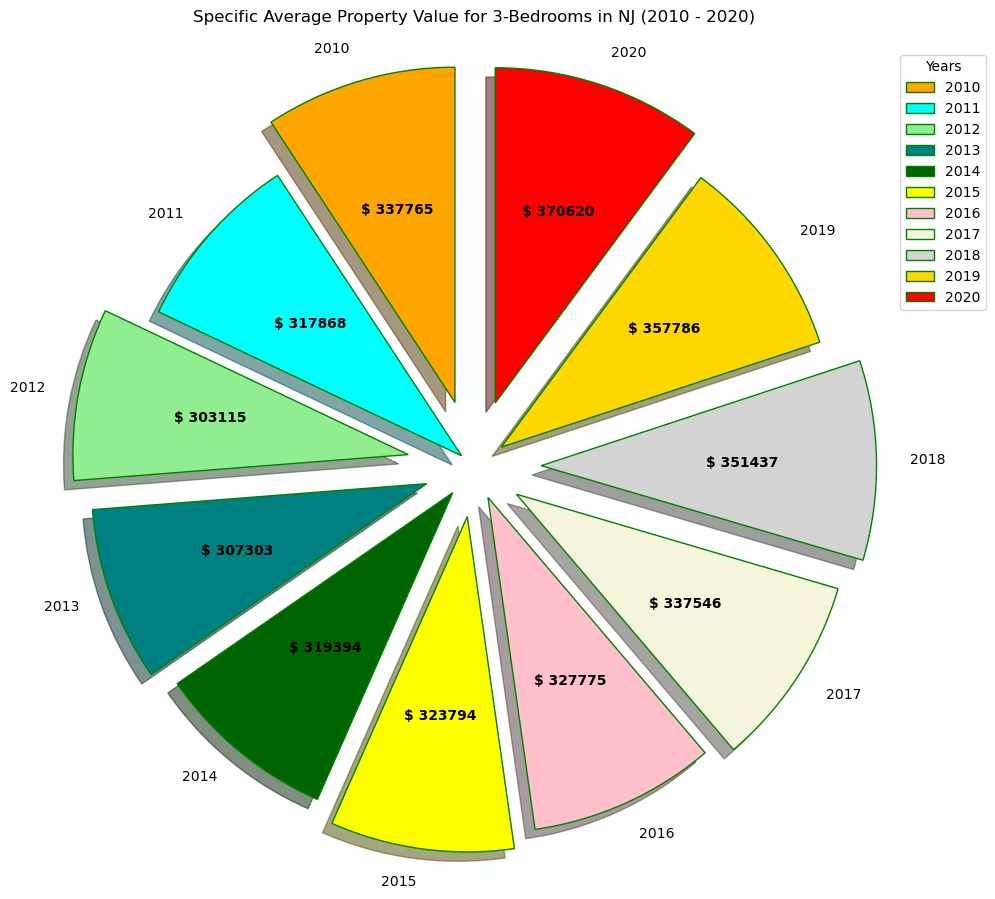

In [16]:

YearsForDecade = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]  
data = AveragePropertyValuePerHousing
  
  
# Creating explode data 
explode = (0.2, 0.05, 0.2, 0.15, 0.1, 0.15, 0.1, 0.15, 0.2, 0.1, 0.2) 
  
# Creating color parameters 
colors = ("orange", "cyan", "lightgreen", "teal", "darkgreen",   
          "yellow", "pink", "beige", "lightgrey", "gold", "red")        

# Options: "orange", "cyan", "green", "grey", "indigo","lightyellow", "darkred", "darkgreen", "black"
# "beige", "brown", "lightgreen", "red", "magenta", "pink", "lightblue","darkblue", "teal","white"

# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "$ {:d}".format(absolute)
    #return "{:.1f}%\n$ ({:d})".format(pct, absolute)  
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 10)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = YearsForDecade, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, YearsForDecade, 
          title ="Years", 
          loc ="best",
          bbox_to_anchor =(1, 0, 0, 1)) # bbox_to_anchor =(1, 0, 0.5, 1) 
  
plt.setp(autotexts, size = 10, weight ="bold") # weight ="bold", is an option for Bold font
ax.set_title(f"Specific Average Property Value for {WhatRoomType} in {WhatState} (2010 - 2020)" "\n", color="black")   ####### YEAR

plt.tight_layout()
plt.savefig(f"Outputs/Pie_AvgPropVal_{WhatState}_2010-2020_SpecificType.jpg", dpi=200)  
# show plot 
plt.show()

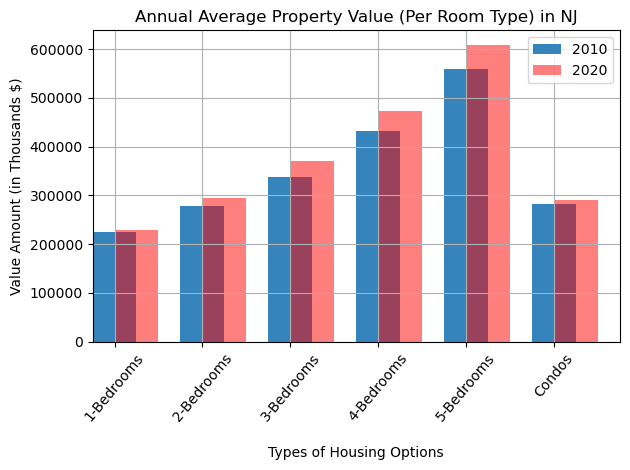

In [17]:
GroupByStateHousing[("2010")][WhatState].plot(kind='bar', alpha=0.9, align="center")
GroupByStateHousing[("2020")][WhatState].plot(kind='bar', color='r', alpha=0.5, align="edge")
plt.legend(loc="best")
plt.legend(loc="best")
plt.grid()
plt.title(f"Annual Average Property Value (Per Room Type) in {WhatState}")
plt.xlabel("\n" "Types of Housing Options")
plt.ylabel("Value Amount (in Thousands $)")

#plt.xlim(5000000, 10000000)
#plt.ylim(40000000, 75000000) 
plt.xticks(plot_X_axisRooms, labels=TypesofHousing, rotation="50")

plt.tight_layout()

#(f"Specific Average Property Value for {WhatRoomType} in {WhatState} (2010 - 2020)

plt.savefig(f"Outputs/Bar_AvgPropValSummary_{WhatState}_2010_2020_SpecificType.jpg", dpi=200)

plt.show()

In [18]:
# New Dataframe
GroupByJustState = AllHousing_Merged_DF.groupby(["State"]).mean()
GroupByJustState.head(2)

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
State,,,,,,,,,,,
AK,231445.06,228717.82,231169.96,236093.23,241064.58,247966.00,252271.47,253235.34,255738.71,266552.22,274801.00
AL,155498.91,149301.99,147113.69,148191.85,150574.62,153680.91,156818.24,161698.78,168549.34,175482.06,183986.25


In [19]:
GroupByJustState = AllHousing_Merged_DF.groupby(["State"]).mean()
GroupByJustState.head(2)

AveragePropertyValueJustState = []

# x-axis (Years in the decade with data)
#YearsForDecade = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
YearsForDecade = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]

plot_X_axisYears = np.arange(len(YearsForDecade))
barWidth = 0.25

# Manual state data appended
AveragePropertyValueJustState.append(GroupByJustState["2010"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2011"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2012"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2013"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2014"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2015"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2016"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2017"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2018"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2019"][WhatState])
AveragePropertyValueJustState.append(GroupByJustState["2020"][WhatState])
AveragePropertyValueJustState

[369851.6152279099,
 349209.56082887657,
 334426.2022854592,
 338790.38139801327,
 350839.63458110555,
 354797.87802393665,
 357893.73564425745,
 366446.7298828629,
 380093.16287878837,
 386299.43165902694,
 398890.9871084796]

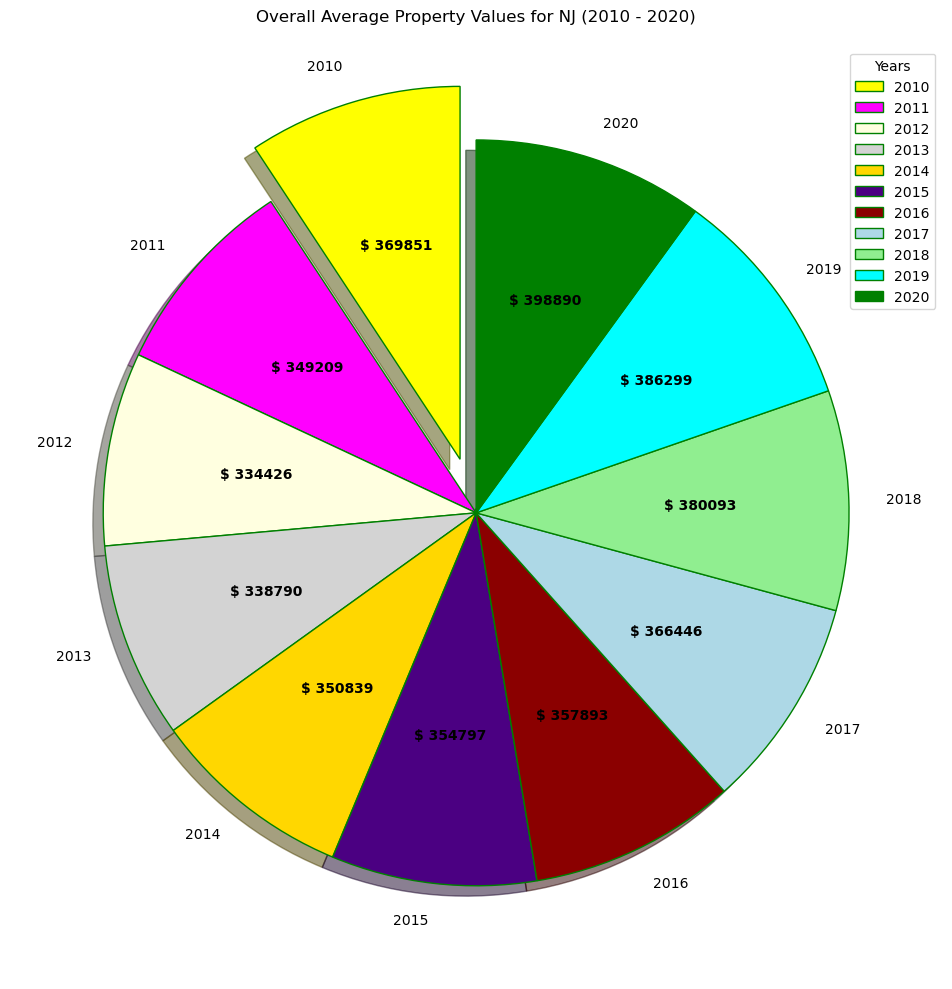

In [20]:
#TypesofHousing = ["1-Bedrooms", "2-Bedrooms", "3-Bedrooms", "4-Bedrooms", "5-Bedrooms", "Condos"]   ################### YEAR
YearsForDecade = ["2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]  
data = AveragePropertyValueJustState
  
  
# Creating explode data 
explode = (0.15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0) 
  
# Creating color parameters 
#colors = ("orange", "cyan", "lightgreen", "teal", "darkgreen",   
#          "yellow", "pink", "beige", "lightgrey", "gold", "red")

colors = ("yellow", "magenta", "lightyellow", "lightgrey", "gold", "indigo",
        "darkred", "lightblue", "lightgreen", "aqua", "green")   
                   

# Options: "orange", "cyan", "green", "grey", "indigo", "lightyellow", "darkred", "darkgreen", "black"
# "beige", "brown", "lightgreen", "red", "magenta", "pink", "lightblue","darkblue", "teal","white"

# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "$ {:d}".format(absolute)
    #return "{:.1f}%\n$ ({:d})".format(pct, absolute)  
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 10)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = YearsForDecade, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, YearsForDecade, 
          title ="Years", 
          loc ="best", 
          bbox_to_anchor =(1, 0, 0, 1)) 
  
plt.setp(autotexts, size = 10, weight ="bold") # weight ="bold", is an option for Bold font
#ax.set_title(f"Total Average Property Values for {WhatState} (2010 - 2020)" "\n", color="black")   ####### YEAR
ax.set_title(f"Overall Average Property Values for {WhatState} (2010 - 2020)" "\n", color="black")

plt.tight_layout()
plt.savefig(f"Outputs/Pie_AvgPropVal_{WhatState}_2010-2020_Overall.jpg", dpi=200)
# show plot 
plt.show()

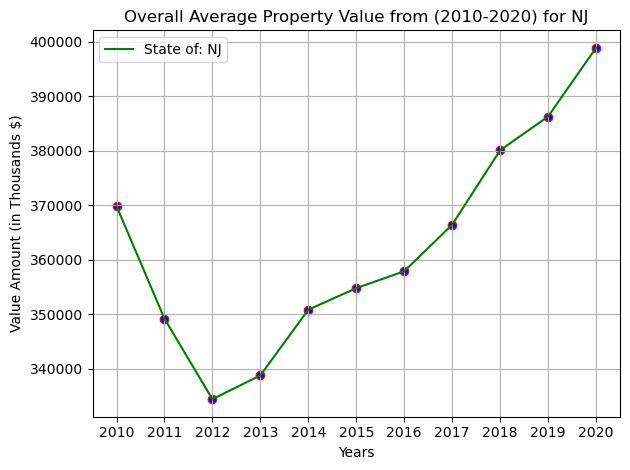

In [21]:
plt.plot(plot_X_axisYears, AveragePropertyValueJustState, color = "g", label=f"State of: {WhatState}")
plt.scatter(plot_X_axisYears, AveragePropertyValueJustState, color = "b", alpha=1, edgecolor="red")

plt.legend(loc="upper left")
plt.grid()
plt.title(f"Overall Average Property Value from (2010-2020) for {WhatState}")
plt.xlabel("Years")
plt.ylabel("Value Amount (in Thousands $)")

#plt.xlim(5000000, 10000000)
plt.xticks(plot_X_axisYears, labels=YearsForDecade)

plt.tight_layout()
plt.savefig(f"Outputs/Line__AvgPropVal_{WhatState}_2010-2020_Overall.jpg", dpi=200)

plt.show()

In [22]:
#Displays floats with 2 decimals
pd.options.display.float_format = '{:.2f}'.format

Test1 =  GroupByStateHousing["2010"][WhatState]
Test2 =  GroupByStateHousing["2010"][WhatState][WhatUnitType]
print(WhatState)
print(WhatRoomType)
print(Test1)
print(WhatUnitType)
print()
print(f"Specific Average Property Value for {WhatRoomType} in {WhatState} (every year from 2010-2012):")
print(AveragePropertyValuePerHousing)
print("")


#print(AveragePropertyValueJustState)
#print(Test1)
print(f"\n" "Overall Average Property Value for {WhatState} (every year from 2010-2012):")
AveragePropertyValueJustState

NJ
3-Bedrooms
Housing Type
Data_1_bed   224367.44
Data_2_bed   277510.79
Data_3_bed   337765.43
Data_4_bed   431070.97
Data_5_bed   559781.51
Data_condo   281856.59
Name: 2010, dtype: float64
Data_3_bed

Specific Average Property Value for 3-Bedrooms in NJ (every year from 2010-2012):
[337765.4330218071, 317868.8037383181, 303115.90249221184, 307303.8412772585, 319394.80404984433, 323794.02772585663, 327775.2347352026, 337546.28925233654, 351437.62943925225, 357786.83317757014, 370620.02975077875]


Overall Average Property Value for {WhatState} (every year from 2010-2012):


[369851.6152279099,
 349209.56082887657,
 334426.2022854592,
 338790.38139801327,
 350839.63458110555,
 354797.87802393665,
 357893.73564425745,
 366446.7298828629,
 380093.16287878837,
 386299.43165902694,
 398890.9871084796]

In [17]:
# _____________________________________________________________________________________________________________________________________________________________ #